###IMAGE PRE-PROCESSING USING OPEN CV

In [189]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [190]:
image = cv2.imread('download.jpeg')

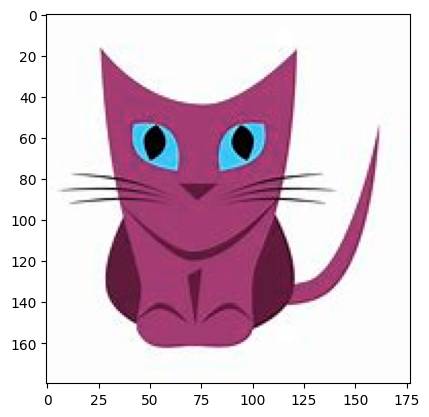

In [191]:
plt.imshow(image)

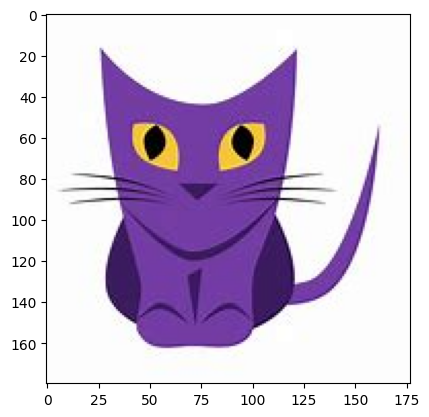

In [192]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

##SHARPEN IMAGE


In [193]:
sharpening_kernel = np.array([[0, -1, 0],
                              [-1,  5, -1],
                              [0, -1, 0]])

In [194]:
sharp_image = cv2.filter2D(image, -1, sharpening_kernel)

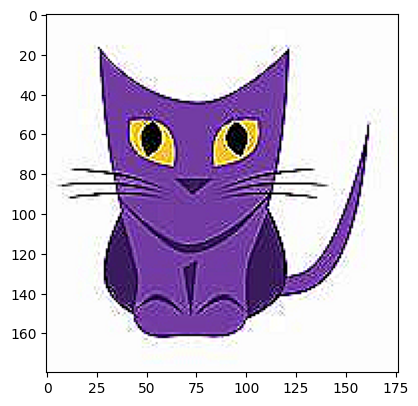

In [195]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(sharp_image, cv2.COLOR_BGR2RGB))
plt.show()

##BLURRED

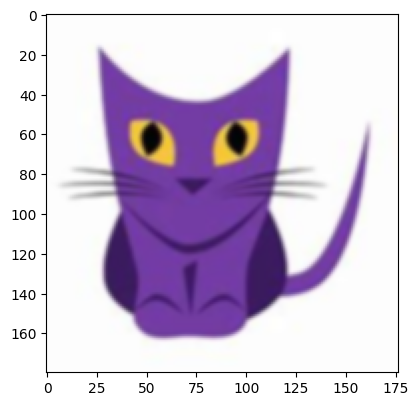

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.show()



##RESTORE

In [11]:
kernel_size=(10,10)
sigma=0.2
kernel=cv2.getGaussianKernel(kernel_size[0], sigma)
blurring = kernel * kernel.T

In [12]:
restored_image = cv2.filter2D(blurred_image, -1, blurring)

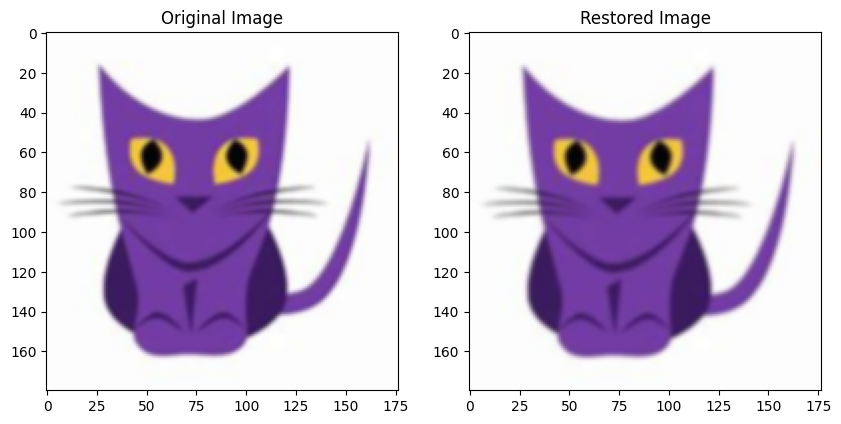

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(restored_image, cv2.COLOR_BGR2RGB))
plt.title('Restored Image')
plt.show()

##ROTATE

In [14]:
def rotate(image, angle):
  height, width=image.shape[:2]
  center=(width//2, height//2)
  rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale =1.0)
  rotated_image = cv2.warpAffine(image, rotation_matrix,(width,height))
  return rotated_image

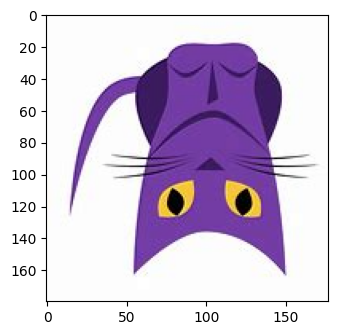

In [15]:
image = cv2.imread('download.jpeg')
angle = 180
rotated_image = rotate(image, angle)
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))

##ADDING NOISE

In [16]:
mean = 0
std = 25
noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
noisy_image = cv2.add(image, noise)

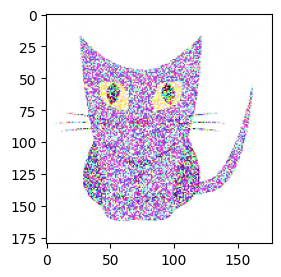

In [17]:
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))

##COMBINE 2 IMAGE

In [18]:
image1 = cv2.imread('download.jpeg')
image2 = cv2.imread('th.jpg')


In [19]:
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

In [20]:
alpha = 0.4

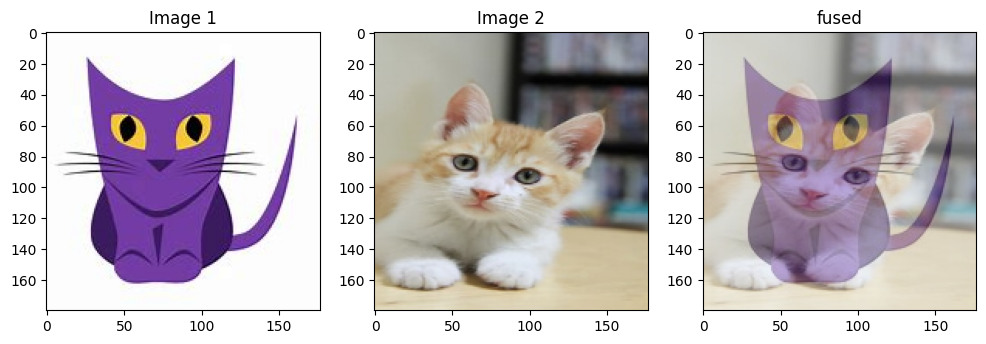

In [21]:
fused = cv2.addWeighted(image1, alpha, image2, 1 - alpha,0)

plt.figure(figsize=(12,4))


plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')


plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')


plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(fused, cv2.COLOR_BGR2RGB))
plt.title('fused')

plt.show()

##BACKGROUND REMOVAL

In [22]:
img = cv2.imread('th.jpg')

In [23]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5,5),0)
_, mask = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)
mask = cv2.bitwise_not(mask)
foreground = cv2.bitwise_and(img, img, mask=mask)
background = np.full_like(img, (255, 255, 255))
result = cv2.bitwise_or(foreground, background)


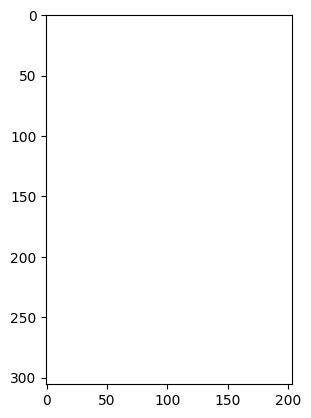

In [24]:
plt.subplot(1,1,1)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

##IMAGE SEGMENTATION


In [42]:
img1=cv2.imread('th.jpg')

In [43]:
gray_scale = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [126]:
threshold = 170
_, binary_mask = cv2.threshold(gray_scale, threshold, threshold,100, cv2.THRESH_BINARY )

In [127]:
contour, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [128]:
segmented_image  =  img1.copy()

In [129]:
cv2.drawContours(segmented_image,contour,-1 ,(0,255,0),2)

array([[[188, 197, 200],
        [184, 193, 196],
        [182, 191, 194],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[184, 193, 196],
        [180, 189, 192],
        [179, 188, 191],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[185, 194, 197],
        [180, 189, 192],
        [179, 188, 191],
        ...,
        [153, 138, 136],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[193, 221, 228],
        [188, 216, 223],
        [188, 215, 225],
        ...,
        [154, 193, 208],
        [153, 194, 209],
        [156, 197, 212]],

       [[191, 217, 224],
        [191, 217, 224],
        [191, 217, 224],
        ...,
        [155, 196, 211],
        [155, 196, 211],
        [156, 197, 212]],

       [[193, 219, 226],
        [193, 219, 226],
        [193, 219, 226],
        ...,
        [157, 198, 213],
        [157, 198, 213],
        [157, 198, 213]]

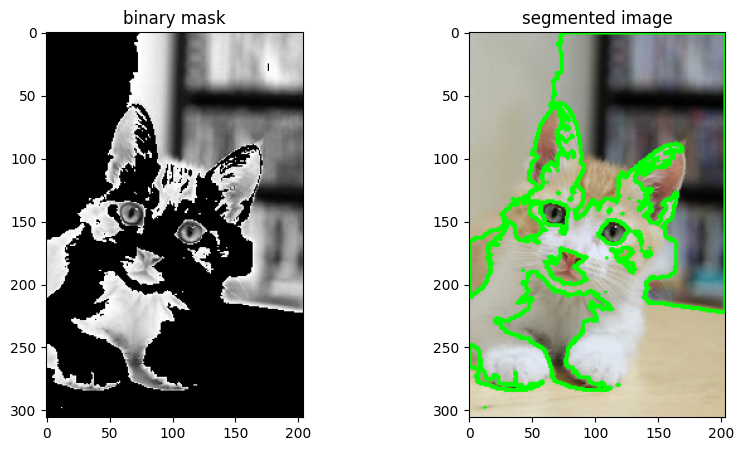

In [132]:


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(binary_mask, cmap='gray')
plt.title('binary mask')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(segmented_image,cv2.COLOR_BGR2RGB))
plt.title('segmented image')
plt.show()

##BORDER OF IMAGE

In [142]:
cat = cv2.imread('cat.jpg')
gray_img = cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)
edge = cv2.Canny(gray_img, 20, 50)
contours, _ = cv2.findContours(edge, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contour_img = np.zeros_like(img1)
cv2.drawContours(contour_img,contours,-1,(0,255,0),2)


array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

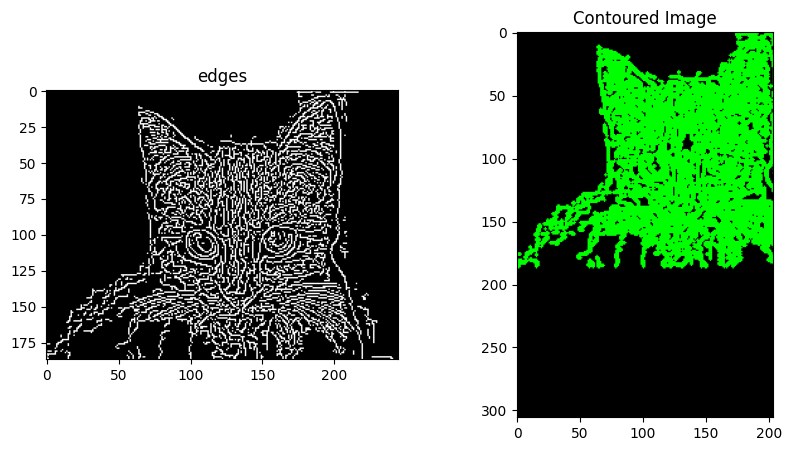

In [146]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(edge, cmap='gray')
plt.title('edges')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title('Contoured Image')


plt.show()

##THERMAL IMAGE

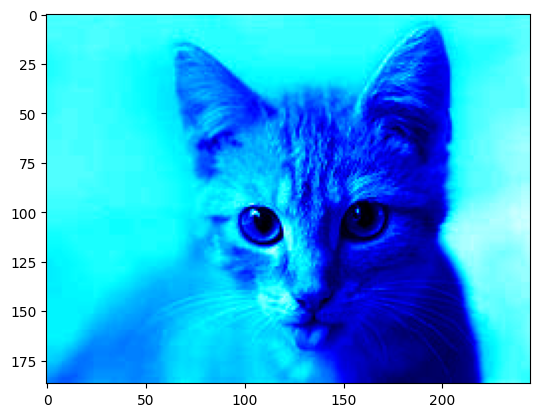

In [148]:
gray_im = cv2.cvtColor(cat,cv2.COLOR_BGR2GRAY)
thermal_image = cv2.applyColorMap(gray_im,cv2.COLORMAP_HOT)
plt.imshow(thermal_image)


## ENHANCE IMAGE

In [184]:

min_intensity=np.min(cat)
max_intensity=np.max(cat)
color = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)

In [185]:
strech_img = cv2.convertScaleAbs(color, alpha = 255/(max_intensity-min_intensity), beta =- min_intensity)

In [186]:
brightness= 50
gamma = 0.9

In [187]:

adj_img = cv2.convertScaleAbs(strech_img, alpha = gamma, beta = brightness)

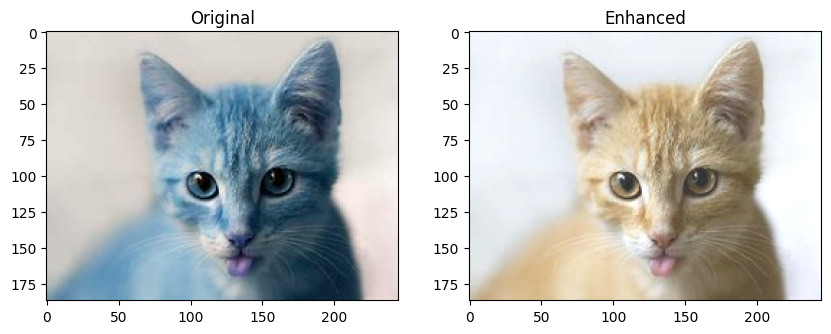

In [188]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(cat)
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(adj_img)
plt.title('Enhanced')

plt.show()